In [1]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot,
                    create_drift_metric_comparison_table_numerical,
                    create_bin_strategy_comparison_table_numerical,
                    create_comparison_with_evidently_table_numerical,
                    create_sample_size_comparison_table_numerical,
                    create_sample_size_bin_comparison_table_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

In [2]:
observations = 100_000
distribution_selection = '1a'

In [3]:
print(f'Observations: {observations}')
print(f'Distribution Selection: {distribution_selection}')

if distribution_selection == '1a':
    description = 'Identlical Normal Distributions - No Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(50, 15, observations) # identical with x

elif distribution_selection == '1b':
    description = 'Normal Distributions - Minimal Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(51, 15, observations) # small drift 

elif distribution_selection == '1c':
    description = 'Normal Distributions - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(52, 15, observations) # small drift 

elif distribution_selection == '1d':
    description = 'Normal Distributions - Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(60, 20, observations) # small drift 

elif distribution_selection == '1e':
    description = 'Normal Distributions - Very Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(150, 15, observations) # small drift 

elif distribution_selection == '1f':
    description = 'Normal Distributions - Extreme Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(1500, 15, observations) # small drift 

elif distribution_selection == '1g':
    description = 'Normal Distributions - No Drift - Different Scale'
    x = np.random.normal(50000, 1500, observations) # reference
    y = np.random.normal(50000, 1500, observations) # small drift 

elif distribution_selection == '2a':
    description = 'Normal Distributions with Outliers - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers

elif distribution_selection == '2b':
    description = 'Normal Distributions with Outliers - Some Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/80))) # same as reference with a some of outliers

elif distribution_selection == '2c':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/60))) # same as reference with some outliers

elif distribution_selection == '2d':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/40))) # same as reference with some outliers

elif distribution_selection == '3a':
    description = 'Identical Uniform Distributions - No Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.random.uniform(10,50, observations) # small drift 

elif distribution_selection == '3b':
    description = 'Uniform Distributions with small excess in the upper range - Small Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.95)),np.random.uniform(20,50, int(observations*0.05)))  # small drift 

elif distribution_selection == '3c':
    description = 'Uniform Distributions with small excess in the upper range - Some Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.7)),np.random.uniform(20,50, int(observations*0.3)))  # some drift 

elif distribution_selection == '4a':
    description = 'Single Value - No Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10) # same single value

elif distribution_selection == '4b':
    description = 'Single Value with some outliers - Drift'
    x = np.full(observations,10) # single value
    y = np.append(np.full(observations,10), np.full(int(observations/50),10.01)) # same single value with some outliers

elif distribution_selection == '4c':
    description = 'Differnt Single Values - Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10.01) # single value



Observations: 100000
Distribution Selection: 1a


In [4]:
Markdown('# <strong>{}</strong><br/>'.format(description))

# <strong>Identlical Normal Distributions - No Drift</strong><br/>

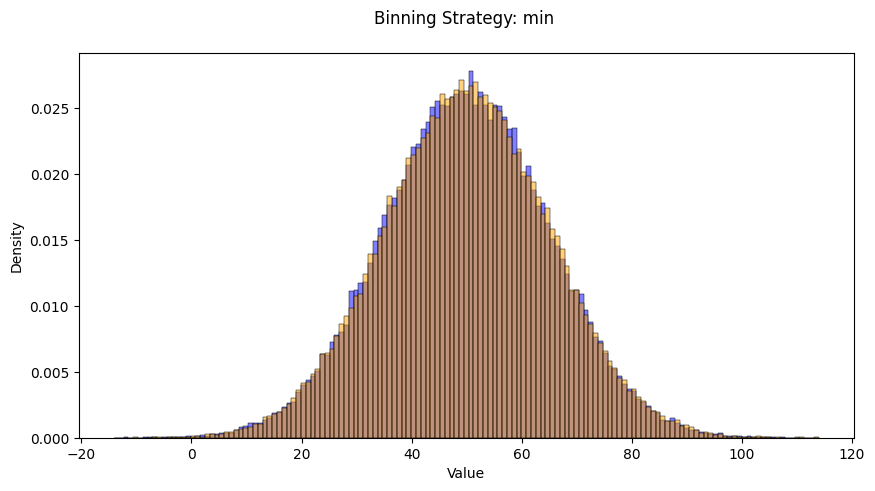

In [5]:
g = numerical_data_distribution_plot(x,y,bin_strategy='min')

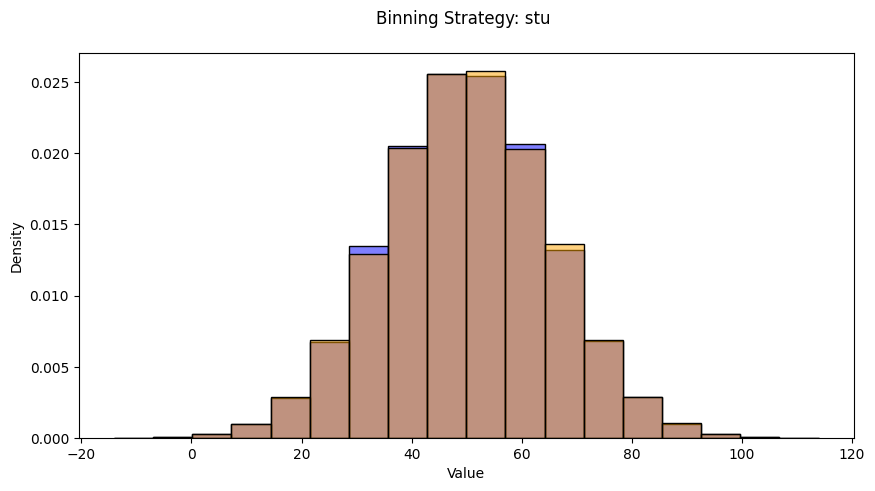

In [6]:
g = numerical_data_distribution_plot(x,y,bin_strategy='stu')

In [7]:
df = create_bin_strategy_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Number of Bins,18.0000,19.0000,147.0000,147.0000
Jensen-Shannon Distance,0.0091,0.0073,0.0239,0.0239
Normed Wasserstein Distance,0.0086,0.0086,0.0086,0.0086
PSI,0.0005,0.0003,0.0028,0.0028
D_inf,0.0037,0.0026,0.0018,0.0018
KS Test,0.0538,0.0538,0.0538,0.0538


In [8]:
df = create_bin_strategy_comparison_table_numerical(x,y, output='drift_detection')
df

,stu,evi,min,max
Number of Bins,18,19,147,147
Jensen-Shannon Distance,no drift,no drift,no drift,no drift
Normed Wasserstein Distance,no drift,no drift,no drift,no drift
PSI,no drift,no drift,no drift,no drift
D_inf,no drift,no drift,no drift,no drift
KS Test,no drift,no drift,no drift,no drift


In [9]:
df = create_comparison_with_evidently_table_numerical(x,y)
df

,Local,Evidently
Jensen-Shannon Distance,0.0073,0.0061
Wasserstein Distance,0.0086,0.0086
PSI,0.0003,0.0003


In [10]:
df = create_sample_size_bin_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Bins Full Sample,18,19,147,147
Bins 1/10th Sample,15,18,68,147
Bins 1/100th Sample,11,18,32,147
Bins 1/1000th Sample,8,18,14,147
"Bins 1/10,000th Sample",5,18,6,147


### Test Jensen-Shannon Distance

In [11]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0091,0.0073,0.0239,0.0239
1/10th Sample,0.0197,0.0224,0.0334,0.0515
1/100th Sample,0.0628,0.0625,0.0742,0.1429
1/1000th Sample,0.0468,0.1389,0.1279,0.3616
"1/10,000th Sample",0.1913,0.4504,0.4627,0.8217


In [12]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,no drift,no drift,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


 ### Test Wasserstein Distance

In [13]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0086,0.0086,0.0086,0.0086
1/10th Sample,0.0078,0.0078,0.0078,0.0078
1/100th Sample,0.0450,0.0450,0.0450,0.0450
1/1000th Sample,0.3206,0.3206,0.3206,0.3206
"1/10,000th Sample",0.4390,0.4390,0.4390,0.4390


In [14]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,no drift,no drift,no drift
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test PSI

In [15]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0005,0.0003,0.0028,0.0028
1/10th Sample,0.0016,0.0025,0.0066,0.0155
1/100th Sample,0.0152,0.0153,0.0482,0.2350
1/1000th Sample,0.1324,0.3598,0.2766,4.0537
"1/10,000th Sample",0.6593,4.9133,1.1618,65.0952


In [16]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,no drift,no drift,drift detected
1/1000th Sample,no drift,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test D_inf

In [17]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0037,0.0026,0.0018,0.0018
1/10th Sample,0.0092,0.0085,0.0032,0.0033
1/100th Sample,0.0139,0.0081,0.0141,0.0099
1/1000th Sample,0.0365,0.0651,0.0540,0.0378
"1/10,000th Sample",0.2072,0.1511,0.1239,0.1922


In [18]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,no drift,no drift,no drift,no drift
1/100th Sample,no drift,no drift,no drift,no drift
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test KS Test

In [19]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0538,0.0538,0.0538,0.0538
1/10th Sample,0.1962,0.1962,0.1962,0.1962
1/100th Sample,0.7804,0.7804,0.7804,0.7804
1/1000th Sample,0.8844,0.8844,0.8844,0.8844
"1/10,000th Sample",0.8727,0.8727,0.8727,0.8727


In [20]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,no drift,no drift,no drift,no drift
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,no drift,no drift,no drift,no drift
1/1000th Sample,no drift,no drift,no drift,no drift
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected
